In [2]:
# Importing relevent packages for the data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [3]:
Basketball_Data = pd.read_csv('/Users/phamlethuylinh/Desktop/cbb.csv')

In [4]:
#Impute POSTSEASON column
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    
categorical = ['POSTSEASON', 'SEED']
df = Basketball_Data.copy()
df['POSTSEASON'] = df['POSTSEASON'].fillna("Not in R68")
df['SEED'] = df['SEED'].fillna(0)

df.POSTSEASON.value_counts()

Not in R68    1979
R64            224
R32            112
S16             56
E8              28
R68             28
F4              14
2ND              7
Champions        7
Name: POSTSEASON, dtype: int64

In [5]:
df[categorical] = df[categorical].apply(lambda series: pd.Series(
LabelEncoder().fit_transform(series[series.notnull()]),
index=series[series.notnull()].index))

print(df)

                    TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  \
0         North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1   
1              Wisconsin   B10  40  36  129.1   93.6   0.9758   54.8   47.7   
2               Michigan   B10  40  33  114.4   90.4   0.9375   53.9   47.7   
3             Texas Tech   B12  38  31  115.2   85.2   0.9696   53.5   43.0   
4                Gonzaga   WCC  39  37  117.8   86.3   0.9728   56.6   41.1   
...                  ...   ...  ..  ..    ...    ...      ...    ...    ...   
2450        Michigan St.   B10  35  26  111.4   87.8   0.9392   50.6   44.5   
2451             Arizona   P12  35  27  114.4   92.2   0.9229   52.5   46.6   
2452              Oregon   P12  37  28  104.8   88.6   0.8728   49.3   46.4   
2453            La Salle   A10  34  24  112.0   96.2   0.8516   51.9   49.3   
2454  Florida Gulf Coast  ASun  35  24  103.4   96.3   0.6952   51.6   46.9   

       TOR  TORD   ORB   DRB   FTR  FTRD  2P_O  2P_

In [6]:
df.POSTSEASON.value_counts()

4    1979
6     224
5     112
8      56
2      28
7      28
3      14
0       7
1       7
Name: POSTSEASON, dtype: int64

In [7]:
df.SEED.value_counts()

0     1979
16      42
11      41
13      29
12      29
3       29
10      28
14      28
5       28
1       28
6       28
7       28
2       28
8       28
15      28
9       27
4       27
Name: SEED, dtype: int64

In [8]:
final_four = df[df["POSTSEASON"] > 4.0]
final_four.head(10)
non_final_four = df[df["POSTSEASON"] < 5.0]

In [9]:
final_four_agg = final_four[["ADJ_T", "EFG_O", "EFG_D"]]
non_final_four_agg = non_final_four[["ADJ_T", "EFG_O", "EFG_D"]]

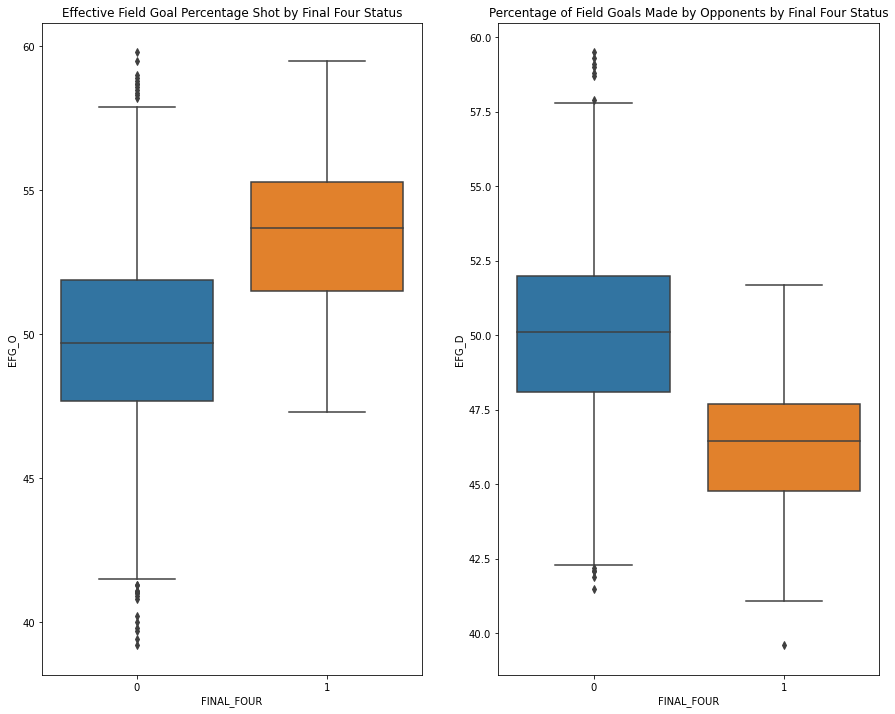

In [10]:
#Comparing the final four teams to other teams
fig, axs = plt.subplots(ncols=2, figsize=(15,12))

f4 = [3,0,1]
df['FINAL_FOUR'] = df['POSTSEASON'].apply(lambda x: 1 if x in f4 else 0)

b = sns.boxplot(x="FINAL_FOUR", y="EFG_O", data=df, ax=axs[0])
c = sns.boxplot(x="FINAL_FOUR", y="EFG_D", data=df, ax=axs[1])

# Add titles to the plots
axs[1].set_title('Percentage of Field Goals Made by Opponents by Final Four Status')
axs[0].set_title('Effective Field Goal Percentage Shot by Final Four Status')

# Display the plots
plt.show()

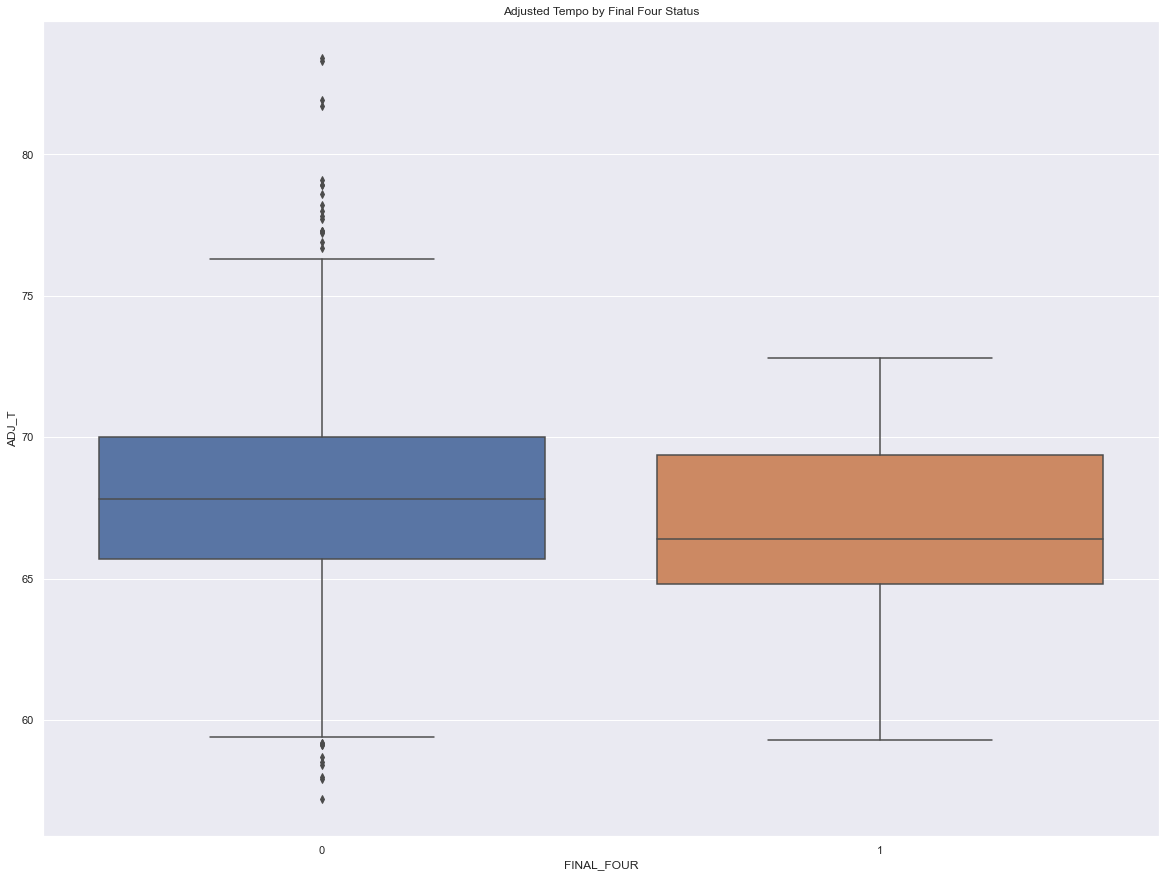

In [910]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(x="FINAL_FOUR", y="ADJ_T", data=df)
ax.set_title("Adjusted Tempo by Final Four Status")
plt.show()

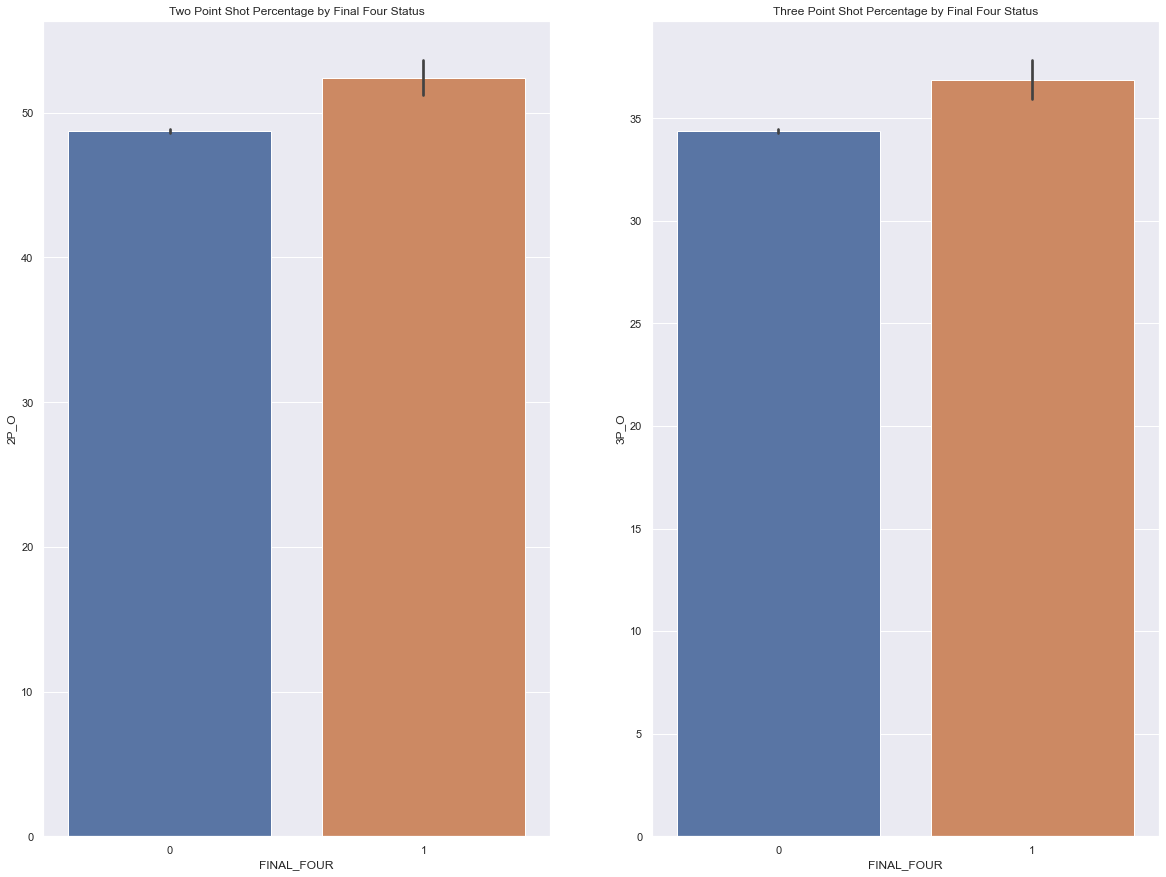

In [916]:
fig, axs = plt.subplots(ncols=2, figsize=(20,15))

a = sns.barplot(x="FINAL_FOUR", y="2P_O", data=df, ax=axs[0])
b = sns.barplot(x="FINAL_FOUR", y="3P_O", data=df, ax=axs[1])

# Add titles to the plots
axs[0].set_title("Two Point Shot Percentage by Final Four Status")
axs[1].set_title('Three Point Shot Percentage by Final Four Status')

# Display the plots
plt.show()

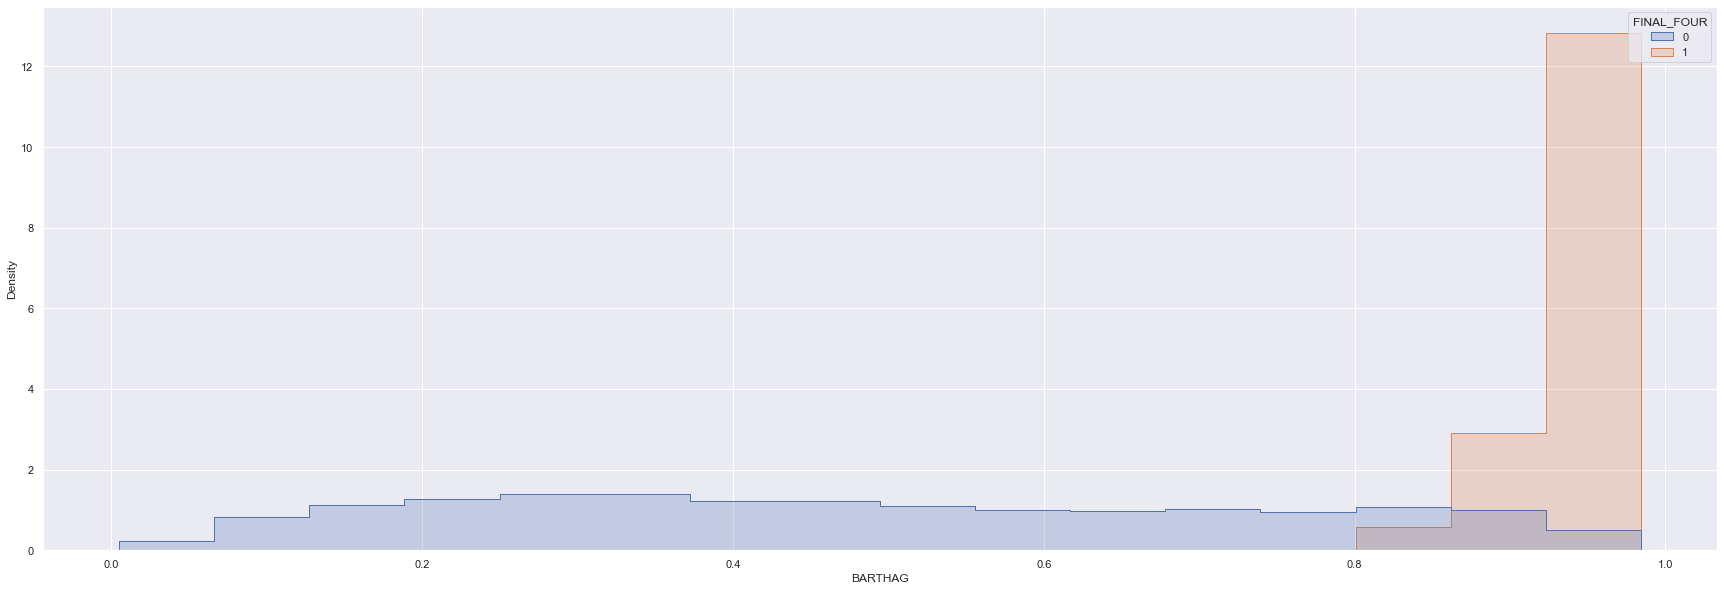

In [875]:
sns.set(rc={"figure.figsize":(30, 10)})

ax2 = sns.histplot(df, x="BARTHAG", hue="FINAL_FOUR", element="step", stat="density", common_norm=False, color=["red", "blue"])

# Show the plot
plt.show()

In [1]:
fig, axs = plt.subplots(ncols=1, figsize=(30,10))
df['Not_Qualified'] = df['FINAL_FOUR'].eq(0)
sns.scatterplot(y=df['ADJDE'], x=df['ADJOE'], hue=df['Not_Qualified'], s = 70)

NameError: name 'plt' is not defined

In [862]:
df.FINAL_FOUR.value_counts()

0    2427
1      28
Name: FINAL_FOUR, dtype: int64

In [753]:
print(df.index.duplicated())

[False False False ... False False False]


In [672]:
region_mapping = {0.0:1.0
                    ,1.0:2.0
                    ,2.0:3.0
                    ,3.0:4.0
                    ,4.0:5.0
                    ,5.0:6.0
                    ,6.0:7.0
                    ,7.0:8.0
                    ,8.0:9.0
                    ,9.0:10.0
                    ,10.0:11.0
                    ,11.0:12.0
                    ,12.0:13.0
                    ,13.0:14.0
                    ,14.0:15.0
                    ,15.0:16.0
                    }
df.assign(SEED = df.SEED.map(region_mapping))

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,index
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,0.0,2.0,2016,0
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,0.0,2.0,2015,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,0.0,4.0,2018,2
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,0.0,4.0,2019,3
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,0.0,2.0,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,8.0,4.0,2013,2450
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,8.0,7.0,2013,2451
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,8.0,13.0,2013,2452
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,8.0,14.0,2013,2453


In [673]:
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
#drop unneeded columns
df1.drop(["TEAM", "CONF", "G", "W", "WAB", "POSTSEASON", "SEED", "YEAR", "index"], axis=1, inplace=True)

# Encode the categorical variable
encoder = LabelEncoder()

# Scale the data
scaler = StandardScaler()
cbb_scaled = scaler.fit_transform(df1)
cbb = pd.DataFrame(cbb_scaled, columns=df1.columns)
cbb.head(10)

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
0,2.711081,-1.272659,1.792184,0.889400,-0.646949,-1.608987,-0.222401,2.618697,-0.023955,-0.703250,-0.940005,1.506517,-1.310430,-0.611860,0.662973,1.186375
1,3.497471,-1.469510,1.880790,1.589497,-0.783049,-3.044278,-1.312666,0.538131,-2.023440,0.040067,-2.221106,1.772491,-1.280489,0.750701,1.201215,-2.597626
2,1.504380,-1.954067,1.731292,1.303093,-0.783049,-2.278789,0.368159,-1.058583,-1.642585,-1.008200,-1.004060,1.742939,-0.651721,0.284562,-0.579121,-0.583561
3,1.612847,-2.741471,1.856589,1.175803,-2.382231,-0.508598,1.867272,-0.598923,-0.436547,-0.588893,0.052849,1.181436,-2.118846,0.750701,-2.028232,-0.095302
4,1.965367,-2.574905,1.869080,2.162304,-3.028709,-1.226243,-0.722106,0.030086,-1.229993,0.573731,-1.500486,2.215783,-2.687731,1.360268,-2.318054,1.125343
5,1.884016,-1.075807,1.609118,0.030189,-1.361477,-0.317226,-1.176383,2.933202,-0.119169,3.013336,0.084876,0.353959,-1.220606,-0.432576,-0.993153,-0.583561
6,2.467029,-1.454367,1.788671,1.525852,-0.680974,-1.991731,0.004737,0.634901,-0.214382,-1.446567,-2.173065,1.358753,-0.412190,1.252697,-0.827540,-0.919238
7,2.968692,-1.923782,1.883132,2.162304,-1.191351,-1.178400,-0.040691,1.433258,0.039520,0.726206,-1.980899,2.097572,-0.801427,1.539552,-1.324378,-0.430980
8,2.670406,-2.029779,1.872202,1.716787,-1.803804,-1.943888,-0.540395,0.126856,-1.483896,-1.313151,-1.596569,1.092778,-0.981075,1.826407,-2.359458,-2.170400
9,2.399237,-1.787500,1.824972,0.602996,-0.646949,-1.226243,-0.040691,2.763853,-1.610848,-0.322061,-0.747840,0.649487,-0.801427,0.392133,-0.289299,1.522053


In [674]:
extracted_col = df[['SEED', "POSTSEASON", "YEAR", "TEAM"]]
print("column to added from first dataframe to second:")
display(extracted_col)

column to added from first dataframe to second:


,SEED,POSTSEASON,YEAR,TEAM
0,1.0,0.0,2016,North Carolina
1,1.0,0.0,2015,Wisconsin
2,3.0,0.0,2018,Michigan
3,3.0,0.0,2019,Texas Tech
4,1.0,0.0,2017,Gonzaga
...,...,...,...,...
2450,3.0,8.0,2013,Michigan St.
2451,6.0,8.0,2013,Arizona
2452,12.0,8.0,2013,Oregon
2453,13.0,8.0,2013,La Salle


In [675]:
cbb = cbb.join(extracted_col)
cbb.head(10)

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,SEED,POSTSEASON,YEAR,TEAM
0,2.711081,-1.272659,1.792184,0.889400,-0.646949,-1.608987,-0.222401,2.618697,-0.023955,-0.703250,-0.940005,1.506517,-1.310430,-0.611860,0.662973,1.186375,1.0,0.0,2016,North Carolina
1,3.497471,-1.469510,1.880790,1.589497,-0.783049,-3.044278,-1.312666,0.538131,-2.023440,0.040067,-2.221106,1.772491,-1.280489,0.750701,1.201215,-2.597626,1.0,0.0,2015,Wisconsin
2,1.504380,-1.954067,1.731292,1.303093,-0.783049,-2.278789,0.368159,-1.058583,-1.642585,-1.008200,-1.004060,1.742939,-0.651721,0.284562,-0.579121,-0.583561,3.0,0.0,2018,Michigan
3,1.612847,-2.741471,1.856589,1.175803,-2.382231,-0.508598,1.867272,-0.598923,-0.436547,-0.588893,0.052849,1.181436,-2.118846,0.750701,-2.028232,-0.095302,3.0,0.0,2019,Texas Tech
4,1.965367,-2.574905,1.869080,2.162304,-3.028709,-1.226243,-0.722106,0.030086,-1.229993,0.573731,-1.500486,2.215783,-2.687731,1.360268,-2.318054,1.125343,1.0,0.0,2017,Gonzaga
5,1.884016,-1.075807,1.609118,0.030189,-1.361477,-0.317226,-1.176383,2.933202,-0.119169,3.013336,0.084876,0.353959,-1.220606,-0.432576,-0.993153,-0.583561,8.0,0.0,2014,Kentucky
6,2.467029,-1.454367,1.788671,1.525852,-0.680974,-1.991731,0.004737,0.634901,-0.214382,-1.446567,-2.173065,1.358753,-0.412190,1.252697,-0.827540,-0.919238,4.0,0.0,2013,Michigan
7,2.968692,-1.923782,1.883132,2.162304,-1.191351,-1.178400,-0.040691,1.433258,0.039520,0.726206,-1.980899,2.097572,-0.801427,1.539552,-1.324378,-0.430980,1.0,1.0,2015,Duke
8,2.670406,-2.029779,1.872202,1.716787,-1.803804,-1.943888,-0.540395,0.126856,-1.483896,-1.313151,-1.596569,1.092778,-0.981075,1.826407,-2.359458,-2.170400,1.0,1.0,2019,Virginia
9,2.399237,-1.787500,1.824972,0.602996,-0.646949,-1.226243,-0.040691,2.763853,-1.610848,-0.322061,-0.747840,0.649487,-0.801427,0.392133,-0.289299,1.522053,1.0,1.0,2017,North Carolina


In [700]:
f4 = [3,0,1]
cbb['FINAL_FOUR'] = cbb['POSTSEASON'].apply(lambda x: 1 if x in f4 else 0)
cbb2 = cbb.drop(['POSTSEASON'], axis = 1)
cbb2.head(10)

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,SEED,YEAR,TEAM,FINAL_FOUR
0,2.711081,-1.272659,1.792184,0.889400,-0.646949,-1.608987,-0.222401,2.618697,-0.023955,-0.703250,-0.940005,1.506517,-1.310430,-0.611860,0.662973,1.186375,1.0,2016,North Carolina,1
1,3.497471,-1.469510,1.880790,1.589497,-0.783049,-3.044278,-1.312666,0.538131,-2.023440,0.040067,-2.221106,1.772491,-1.280489,0.750701,1.201215,-2.597626,1.0,2015,Wisconsin,1
2,1.504380,-1.954067,1.731292,1.303093,-0.783049,-2.278789,0.368159,-1.058583,-1.642585,-1.008200,-1.004060,1.742939,-0.651721,0.284562,-0.579121,-0.583561,3.0,2018,Michigan,1
3,1.612847,-2.741471,1.856589,1.175803,-2.382231,-0.508598,1.867272,-0.598923,-0.436547,-0.588893,0.052849,1.181436,-2.118846,0.750701,-2.028232,-0.095302,3.0,2019,Texas Tech,1
4,1.965367,-2.574905,1.869080,2.162304,-3.028709,-1.226243,-0.722106,0.030086,-1.229993,0.573731,-1.500486,2.215783,-2.687731,1.360268,-2.318054,1.125343,1.0,2017,Gonzaga,1
5,1.884016,-1.075807,1.609118,0.030189,-1.361477,-0.317226,-1.176383,2.933202,-0.119169,3.013336,0.084876,0.353959,-1.220606,-0.432576,-0.993153,-0.583561,8.0,2014,Kentucky,1
6,2.467029,-1.454367,1.788671,1.525852,-0.680974,-1.991731,0.004737,0.634901,-0.214382,-1.446567,-2.173065,1.358753,-0.412190,1.252697,-0.827540,-0.919238,4.0,2013,Michigan,1
7,2.968692,-1.923782,1.883132,2.162304,-1.191351,-1.178400,-0.040691,1.433258,0.039520,0.726206,-1.980899,2.097572,-0.801427,1.539552,-1.324378,-0.430980,1.0,2015,Duke,1
8,2.670406,-2.029779,1.872202,1.716787,-1.803804,-1.943888,-0.540395,0.126856,-1.483896,-1.313151,-1.596569,1.092778,-0.981075,1.826407,-2.359458,-2.170400,1.0,2019,Virginia,1
9,2.399237,-1.787500,1.824972,0.602996,-0.646949,-1.226243,-0.040691,2.763853,-1.610848,-0.322061,-0.747840,0.649487,-0.801427,0.392133,-0.289299,1.522053,1.0,2017,North Carolina,1


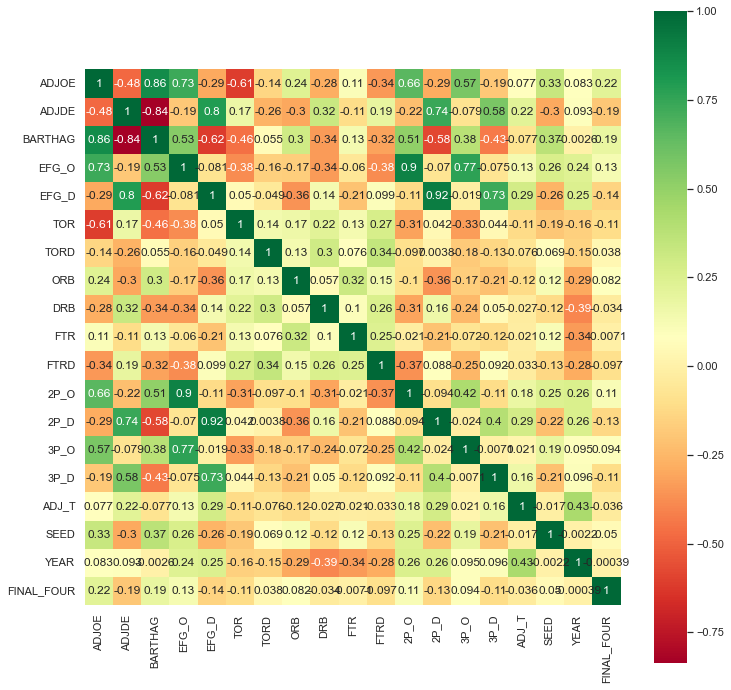

In [878]:
#Inspect multicollinearity in the dataset
plt.figure(figsize=(12,12))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(cbb2.corr(), annot=True,cmap='RdYlGn',square=True) 

In [902]:
#Make a correlation matrix 
corr_mat = cbb2.corr()
corr_mat['FINAL_FOUR']
so = corr_mat['FINAL_FOUR'].sort_values(kind="quicksort", ascending=False)

print(so)

FINAL_FOUR    1.000000
ADJOE         0.220670
BARTHAG       0.188691
EFG_O         0.126537
2P_O          0.114314
3P_O          0.094113
ORB           0.082487
SEED          0.049546
TORD          0.037975
YEAR         -0.000394
FTR          -0.007102
DRB          -0.033984
ADJ_T        -0.035990
FTRD         -0.096543
TOR          -0.105833
3P_D         -0.110486
2P_D         -0.128004
EFG_D        -0.144931
ADJDE        -0.192866
Name: FINAL_FOUR, dtype: float64


In [903]:
#Implement SMOTE in Python for imbalanced data
X_train = cbb2[cbb2["YEAR"] < 2019].drop(["FINAL_FOUR", "TEAM", "BARTHAG"], axis=1)
y_train = cbb2[cbb2["YEAR"] < 2019]["FINAL_FOUR"]
X_test = cbb2[cbb2["YEAR"] == 2019].drop(["FINAL_FOUR", "TEAM", "BARTHAG"], axis=1)
y_test = cbb2[cbb2["YEAR"] == 2019]["FINAL_FOUR"]
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
X_train_smote,y_train_smote=os.fit_resample(X_train, y_train)
y_train_smote.value_counts()

1    2078
0    2078
Name: FINAL_FOUR, dtype: int64

In [896]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model2 = LogisticRegression(max_iter = 1000)
model2.fit(X_train_smote, y_train_smote)
y_pred = model2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model2.score(X_test, y_test)))
# Get the team names of the predicted Final Four teams
teams = cbb2[cbb2["YEAR"] == 2019]["TEAM"]
final_four_teams = teams[y_pred == 1]
print(final_four_teams.value_counts())

Accuracy of logistic regression classifier on test set: 0.93
Texas Tech        1
Louisville        1
LSU               1
Oregon            1
Michigan          1
Houston           1
Virginia Tech     1
North Carolina    1
Florida St.       1
Kansas St.        1
Iowa St.          1
Wisconsin         1
Syracuse          1
VCU               1
Virginia          1
Florida           1
Oklahoma          1
Kansas            1
Maryland          1
UCF               1
Auburn            1
Michigan St.      1
Gonzaga           1
Kentucky          1
Purdue            1
Duke              1
Tennessee         1
Name: TEAM, dtype: int64


In [904]:
# Get the actual Final Four Teams
teams = df[df["YEAR"] == 2019]
final_four_teams = teams[teams["FINAL_FOUR"] == 1]["TEAM"]
print(final_four_teams.value_counts())

Texas Tech      1
Virginia        1
Michigan St.    1
Auburn          1
Name: TEAM, dtype: int64


In [900]:
# Get the feature importances
# Larger absolute value of the coefficient indicates a stronger association between the feature and the target variable, so I will turn every coefficients into their absolute value.
coefficients = abs(model2.coef_)
coef_df = pd.DataFrame({'Feature': X_train.columns,
                        'Coefficient': coefficients[0]})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
coef_df

,Feature,Coefficient
0,ADJOE,5.148115
1,ADJDE,4.774954
4,TOR,0.947349
13,3P_D,0.608433
6,ORB,0.565195
10,2P_O,0.495534
12,3P_O,0.482227
7,DRB,0.471692
3,EFG_D,0.392539
15,SEED,0.384302


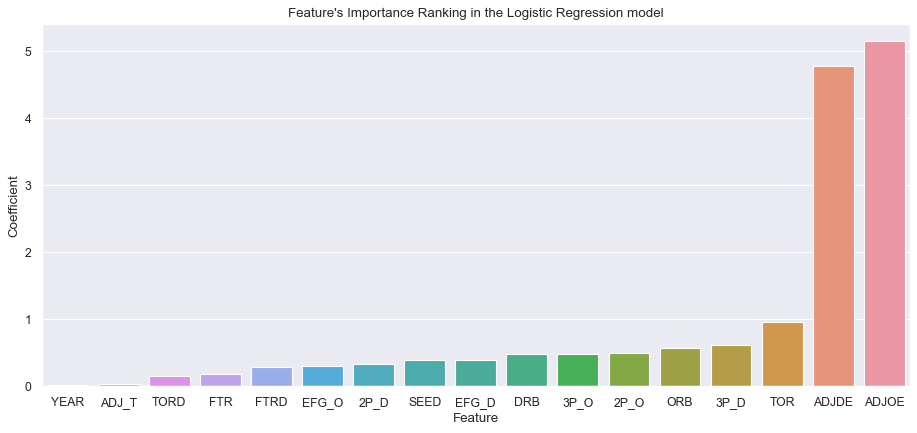

In [901]:
# sort the coefficients in descending order
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(14, 6), dpi=80)
sns.barplot(x = "Feature",y = 'Coefficient',data = coef_df)
plt.gca().invert_xaxis()
plt.title("Feature's Importance Ranking in the Logistic Regression model")
plt.show()